# Content list
1. Import libraries
2. Import data
3. Analysis

# 01. Import libraries

In [2]:
# Import analysis and visualization libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# 02. Import data

In [3]:
# Create path
path = r'C:\Users\adrig\OneDrive\Documentos\CARRIERFOUNDRY\DATA IMMERSION\ACHIEVEMENT 4\Ex_4.2_Python\03-2025 Instacart Basket Analysis'

In [4]:
# Import data
ords_prods_all = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_all_custom_prof.pkl'))

In [4]:
ords_prods_all.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_last_order,new_customer,product_id,add_to_cart_order,reordered,...,customer_since,n_dependants,fam_status,income,region,age_group,income_segment,dependant_flag,family_profile,customer_profile
0,2539329,1,1,2,8,NaN,True,196,1,0,...,2019-02-17,3,married,40423,South,young adult,"mid income (60,000-179,000)",has dependants,Married with dependants,Established Families
1,2539329,1,1,2,8,NaN,True,14084,2,0,...,2019-02-17,3,married,40423,South,young adult,"mid income (60,000-179,000)",has dependants,Married with dependants,Established Families
2,2539329,1,1,2,8,NaN,True,12427,3,0,...,2019-02-17,3,married,40423,South,young adult,"mid income (60,000-179,000)",has dependants,Married with dependants,Established Families
3,2539329,1,1,2,8,NaN,True,26088,4,0,...,2019-02-17,3,married,40423,South,young adult,"mid income (60,000-179,000)",has dependants,Married with dependants,Established Families
4,2539329,1,1,2,8,NaN,True,26405,5,0,...,2019-02-17,3,married,40423,South,young adult,"mid income (60,000-179,000)",has dependants,Married with dependants,Established Families


# 03. Analysis

## 03.1 Customer profile - products purchased


In [14]:
# Total expenditure by order, customer profile and department
total_exp_dep = ords_prods_all.groupby(['customer_profile', 'department_id', 'order_id'])['prices'].sum().reset_index()

In [63]:
total_exp_dep.head()

,customer_profile,department_id,order_id,prices
0,Affluent Customers,1,256,22.200001
1,Affluent Customers,1,338,11.000000
2,Affluent Customers,1,950,10.700000
3,Affluent Customers,1,1569,28.900000
4,Affluent Customers,1,2016,10.700000


In [71]:
avg_exp_dep = total_exp_dep.groupby(['customer_profile', 'department_id'])['prices'].mean().reset_index()

In [72]:
avg_exp_dep.rename(columns ={'prices': 'avg_expenditure'}, inplace=True)

In [73]:
avg_exp_dep.sort_values(by = 'avg_expenditure', ascending = False).head(20)

,customer_profile,department_id,avg_expenditure
66,Low-Budget Families,4,32.975876
108,Retired and Solo,4,31.730366
87,Multi-gen Families,4,31.492119
45,Independent Adult,4,31.356813
3,Affluent Customers,4,27.033058
24,Established Families,4,25.134905
11,Affluent Customers,12,22.119099
15,Affluent Customers,16,21.777439
78,Low-Budget Families,16,21.501987
99,Multi-gen Families,16,20.977560


In [74]:
avg_exp_dep_top = avg_exp_dep.sort_values(by = 'avg_expenditure', ascending=False)

In [96]:
avg_exp_dep_top.tail(20)

,customer_profile,department_id,avg_expenditure
89,Multi-gen Families,6,9.138840
1,Affluent Customers,2,9.090448
5,Affluent Customers,6,8.982686
60,Independent Adult,19,8.853478
123,Retired and Solo,19,8.838395
102,Multi-gen Families,19,8.832630
93,Multi-gen Families,10,8.796788
26,Established Families,6,8.761746
72,Low-Budget Families,10,8.742543
51,Independent Adult,10,8.505225


In [78]:
# Top 5 departments by profile
customers_top_dep_avg_exp = avg_exp_dep_top.reset_index().sort_values(['customer_profile', 'avg_expenditure'], ascending=False).groupby('customer_profile').head(5)

In [79]:
customers_top_dep_avg_exp

,index,customer_profile,department_id,avg_expenditure
1,108,Retired and Solo,4,31.730366
10,120,Retired and Solo,16,20.866747
14,116,Retired and Solo,12,19.980766
20,122,Retired and Solo,18,18.171013
30,105,Retired and Solo,1,14.647353
2,87,Multi-gen Families,4,31.492119
9,99,Multi-gen Families,16,20.977560
13,95,Multi-gen Families,12,20.193203
18,101,Multi-gen Families,18,18.344990
25,88,Multi-gen Families,5,15.500724


Visualization

In [80]:
# Change department_id to name
id_to_name = {4: 'produce', 16: 'dairy eggs', 12: 'meat seafood', 18: 'babies', 1: 'frozen', 5: 'alcohol', 7: 'beverages'}

In [81]:
# Pivot to create stacked bar
pivot_df_avg = customers_top_dep_avg_exp.pivot(index = 'customer_profile', columns = 'department_id', values = 'avg_expenditure').fillna(0)

In [82]:
# Change to names of dep
pivot_df_avg.columns = pivot_df_avg.columns.map(id_to_name)

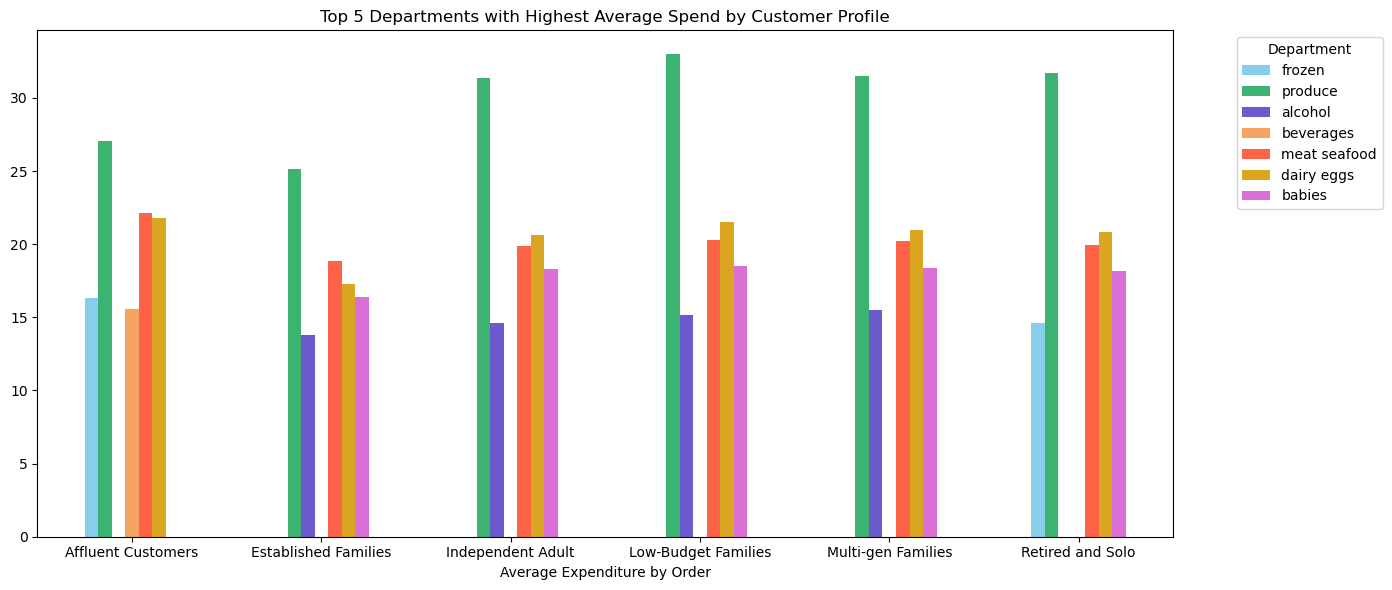

In [94]:
# Create stacked bar
bar_top_dep_avg_exp = pivot_df_avg.plot(kind='bar', figsize = (14,6), color = {'produce': 'mediumseagreen', 'dairy eggs': 'goldenrod', 'meat seafood':'tomato', 'babies': 'orchid', 'frozen': 'skyblue', 'alcohol': 'slateblue', 'beverages': 'sandybrown'}, rot=0)

plt.title('Top 5 Departments with Highest Average Spend by Customer Profile')
plt.xlabel('Average Expenditure by Order')
plt.ylabel('')
plt.legend(title= 'Department', bbox_to_anchor=(1.05,1), loc='upper left')
plt.tight_layout()

In [95]:
# Export bar chart
bar_top_dep_avg_exp.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'top_5_dep_avg_exp_bar.png'))

## 03.2 Purchasing habits

When each customer profile buys?

In [113]:
# Create a subset for day of the week
purchase_day_df = ords_prods_all[['customer_profile', 'orders_day_of_week']]

In [118]:
# Group orders by customer profile and day of week and count
day_counts = (purchase_day_df.groupby(['customer_profile', 'orders_day_of_week']).size().reset_index(name = 'order_count'))

([<matplotlib.axis.XTick at 0x1bdecdff590>,
 [Text(0, 0, 'Sat'),
  Text(1, 0, 'Sun'),
  Text(2, 0, 'Mon'),
  Text(3, 0, 'Tue'),
  Text(4, 0, 'Wed'),
  Text(5, 0, 'Thu'),
  Text(6, 0, 'Fri')])

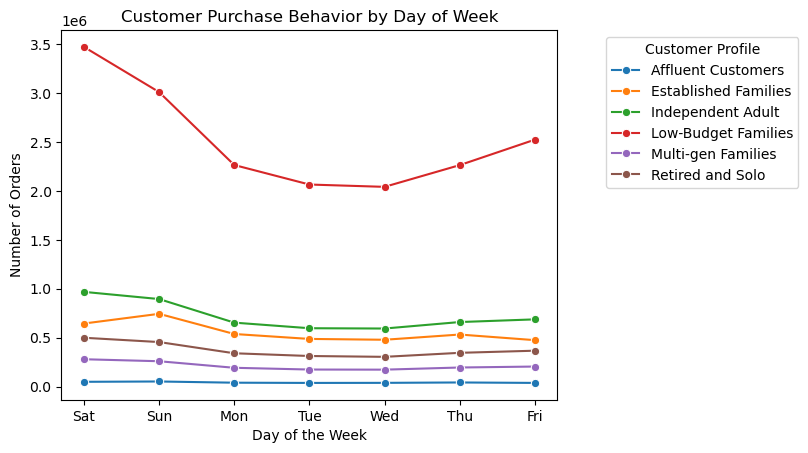

In [172]:
# Line chart
line_day = sns.lineplot(data = day_counts, x = 'orders_day_of_week', y='order_count', hue = 'customer_profile', marker = 'o')
plt.title('Customer Purchase Behavior by Day of Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Orders')
plt.legend(title='Customer Profile', bbox_to_anchor = (1.5, 1), loc='upper right')
plt.xticks(ticks=[0, 1, 2, 3, 4, 5, 6], labels=['Sat', 'Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri'])

In [173]:
# Export linechart
line_day.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_dow_custom_prof.png'), bbox_inches='tight', dpi=300)

In [142]:
# Create a subset for hour of the day
purchase_hour_df = ords_prods_all[['customer_profile', 'order_hour_of_day']]

In [143]:
# Count orders per hour of day and customer profile
hour_counts = (purchase_hour_df.groupby(['customer_profile', 'order_hour_of_day']).size().reset_index(name = 'order_count'))

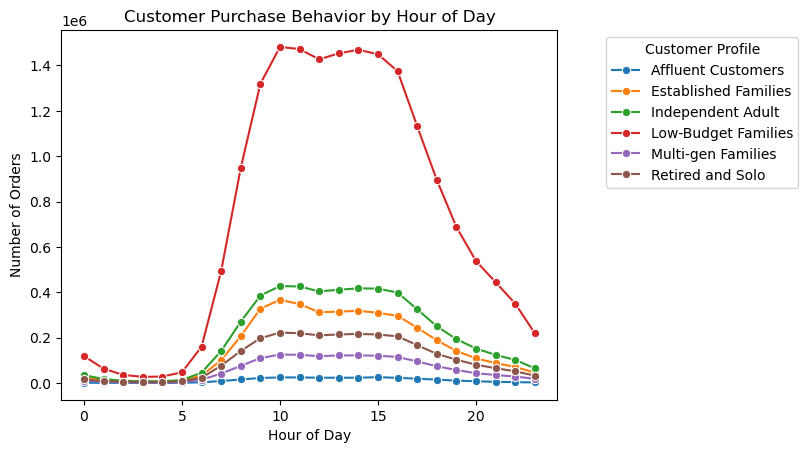

In [145]:
# Line chart
line_hour = sns.lineplot(data = hour_counts, x = 'order_hour_of_day', y='order_count', hue = 'customer_profile', marker = 'o')
plt.title('Customer Purchase Behavior by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Orders')
plt.legend(title='Customer Profile', bbox_to_anchor = (1.5, 1), loc='upper right')

In [174]:
# Export linechart
line_hour.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_hour_of_day_custom_prof.png'), bbox_inches='tight', dpi=300)

## 03.3 Aggregations

In [154]:
# Frequency usage by profile aggregations
ords_prods_all.groupby('customer_profile').agg({'days_since_last_order':['max', 'mean', 'min']}).reset_index()

customer_profile days_since_last_order                
                                          max       mean  min
0    Affluent Customers                  30.0  10.131962  0.0
1  Established Families                  30.0  11.039323  0.0
2     Independent Adult                  30.0  10.822759  0.0
3   Low-Budget Families                  30.0  10.779819  0.0
4    Multi-gen Families                  30.0  10.756370  0.0
5      Retired and Solo                  30.0  10.758589  0.0

In [164]:
# Total expend per order per profile
total_expend_per_order = ords_prods_all.groupby(['customer_profile', 'order_id'])['prices'].sum().reset_index()
total_expend_per_order.rename(columns={'prices' : 'total_exp'}, inplace = True)
total_expend_per_order.head()

,customer_profile,order_id,total_exp
0,Affluent Customers,43,53.400002
1,Affluent Customers,199,62.299999
2,Affluent Customers,256,139.800003
3,Affluent Customers,338,176.699997
4,Affluent Customers,682,9.200000


In [165]:
# Total expend per order aggregations 
total_expend_per_order.groupby('customer_profile').agg({'total_exp':['max', 'mean', 'min']}).reset_index()

customer_profile    total_exp                
                                 max       mean  min
0    Affluent Customers  1047.400024  89.947762  1.0
1  Established Families   842.099976  59.375671  1.0
2     Independent Adult   712.000000  78.155907  1.0
3   Low-Budget Families  1092.199951  83.973366  1.0
4    Multi-gen Families   750.299988  79.455208  1.0
5      Retired and Solo   875.000000  78.924706  1.0

Customer profiles by region

In [179]:
# Group by region and customer profile
region_profile = ords_prods_all.groupby(['region', 'customer_profile'])['user_id'].nunique().reset_index()
region_profile.head(10)

,region,customer_profile,user_id
0,Midwest,Affluent Customers,250
1,Midwest,Established Families,6163
2,Midwest,Independent Adult,6318
3,Midwest,Low-Budget Families,20625
4,Midwest,Multi-gen Families,1835
5,Midwest,Retired and Solo,3185
6,Northeast,Affluent Customers,170
7,Northeast,Established Families,4615
8,Northeast,Independent Adult,4755
9,Northeast,Low-Budget Families,15364


In [188]:
# Create a pivot table
pivot_region = region_profile.pivot(index = 'region', columns = 'customer_profile', values = 'user_id')

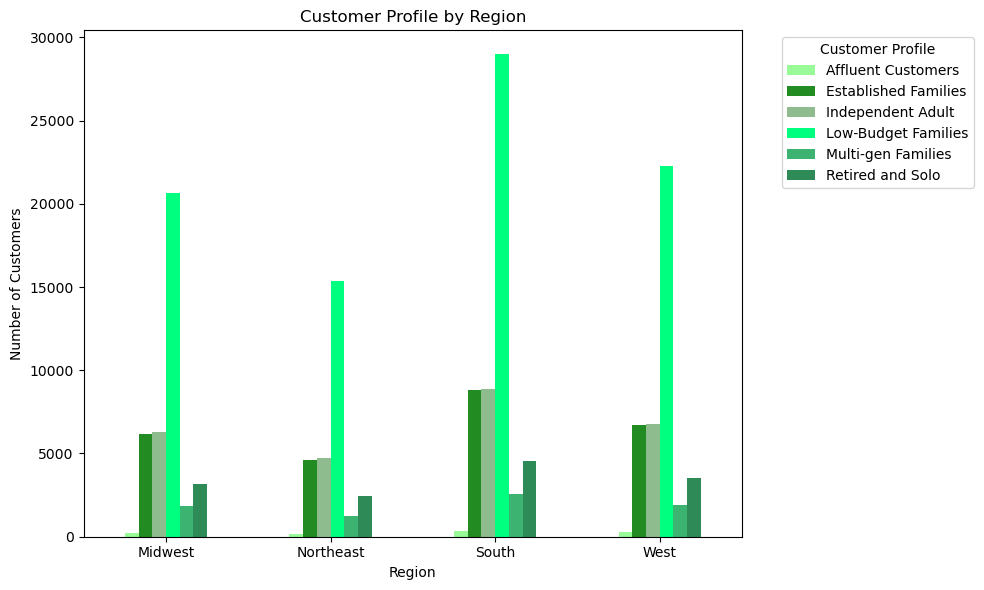

In [196]:
# Create stacked bar
bar_region =pivot_region.plot(kind='bar', figsize = (10,6), color = { 'mediumseagreen','darkseagreen', 'palegreen', 'forestgreen', 'springgreen', 'seagreen'}, rot=0)

plt.title('Customer Profile by Region')
plt.xlabel('Region')
plt.ylabel('Number of Customers')
plt.legend(title= 'Customer Profile', bbox_to_anchor=(1.05,1), loc='upper left')
plt.tight_layout()

In [207]:
# Export linechart
bar_region.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_region_profile.png'), bbox_inches='tight', dpi=300)